In [1]:
# Librairies
import os
import sys
code_path = os.path.split(os.getcwd())[0]
sys.path.append(code_path)
import numpy as np
import seaborn as sns
import time
from scipy.stats import rankdata
import argparse
from setting import *
from utils import *
from XAI_visualise import *

/projects/GraphNEx/anaconda3/envs/GraphNEx/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Arguments
name = "pancan"
exp_1 = "_exp_1"
exp_2 = "_exp_2"
model_name_1 = "LR"
model_name_2 = "LR"
n_gene = 100
set_name = {"LR": "order_IG_LR_set_train",
            "MLP": "order_IG_MLP_set_train",
            "GCN": "order_IG_GCN_set_train",
            "LR_L1_penalty": "order_IG_LR_L1_penalty_set_train",
            "DESeq2": "order_DESeq2",
            "MI": "order_MI"}

In [3]:
# Path
save_path = get_save_path(name, code_path)

Histogram


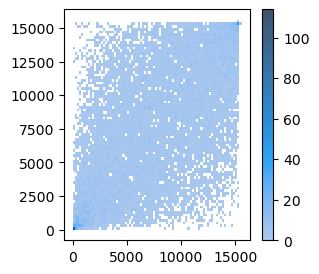

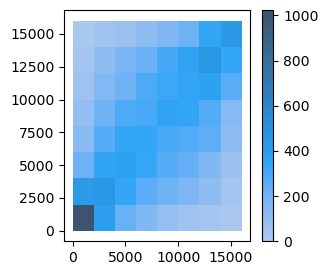

Kde


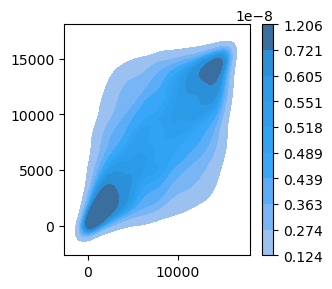

In [4]:
# List of ranked genes
set_name_1 = set_name[model_name_1] + exp_1
set_name_2 = set_name[model_name_2] + exp_2
# set_name_1 = "order_IG_LR_set_train_exp_1"
# set_name_2 = "order_weight_LR_exp_1"

# Load gene names ranked by order of importance
gene_list_1 = np.load(os.path.join(save_path, "order", set_name_1 + ".npy"), allow_pickle=True)
gene_list_2 = np.load(os.path.join(save_path, "order", set_name_2 + ".npy"), allow_pickle=True)

# Information
gene_name = np.sort(gene_list_1)
n_feat = len(gene_name)

# Load gene importance values
gene_value_1 = np.load(os.path.join(save_path, "order", set_name_1 + "_values.npy"), allow_pickle=True)
gene_value_2 = np.load(os.path.join(save_path, "order", set_name_2 + "_values.npy"), allow_pickle=True)

# print("Number of non-zero coefficients")
# print(set_name_1, np.sum(gene_value_1 != 0))
# print(set_name_2, np.sum(gene_value_2 != 0))

# Attribute to each gene a value
gene_value_1 = np.array([gene_value_1[np.argwhere(gene_name[k] == gene_list_1)[0, 0]] for k in range(n_feat)])
gene_value_2 = np.array([gene_value_2[np.argwhere(gene_name[k] == gene_list_2)[0, 0]] for k in range(n_feat)])

# Attribute to each gene a rank
gene_rank_1 = rankdata(-gene_value_1, method='max')
gene_rank_2 = rankdata(-gene_value_2, method='max')

# Plot example
# print("Scatter plot")
# plt.plot(gene_rank_1, gene_rank_2, '.')
# plt.show()

print("Histogram")
binwidth = 200
plt.figure(figsize=(3, 3))
sns.histplot(x=gene_rank_1, y=gene_rank_2, binrange=[0, (n_feat // binwidth + 1) * binwidth ], vmin=0, cbar=True, bins=(n_feat // binwidth + 1))
plt.show()

binwidth = 2000
plt.figure(figsize=(3, 3))
sns.histplot(x=gene_rank_1, y=gene_rank_2, binrange=[0, (n_feat // binwidth + 1) * binwidth ], vmin=0, cbar=True, bins=(n_feat // binwidth + 1))
plt.show()

print("Kde")
plt.figure(figsize=(3, 3))
sns.kdeplot(x=gene_rank_1, y=gene_rank_2, cbar=True, fill=True)
plt.show()

## Comparison within a model

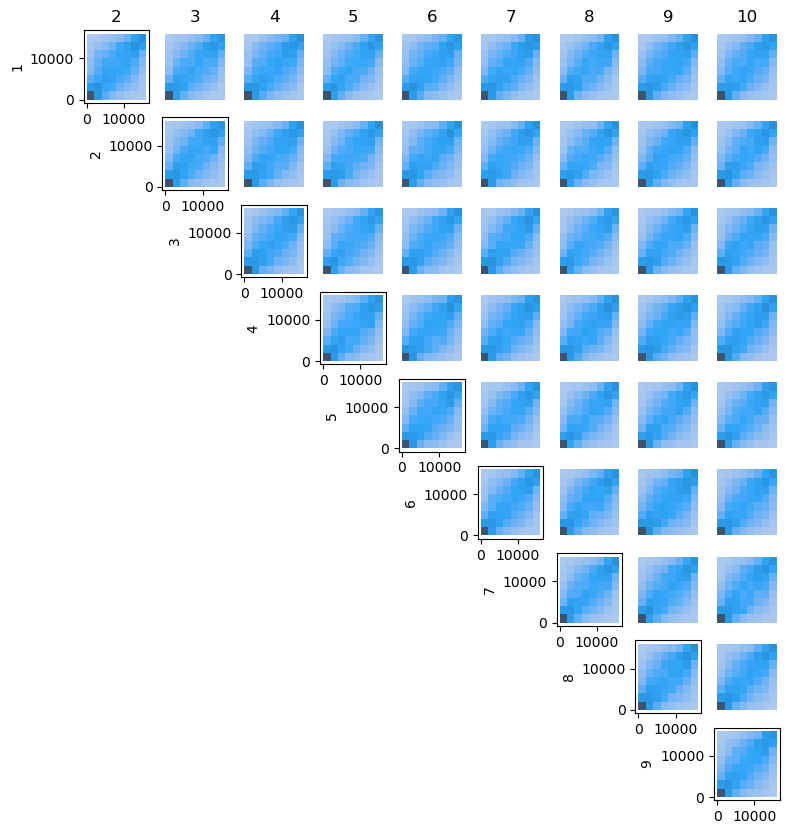

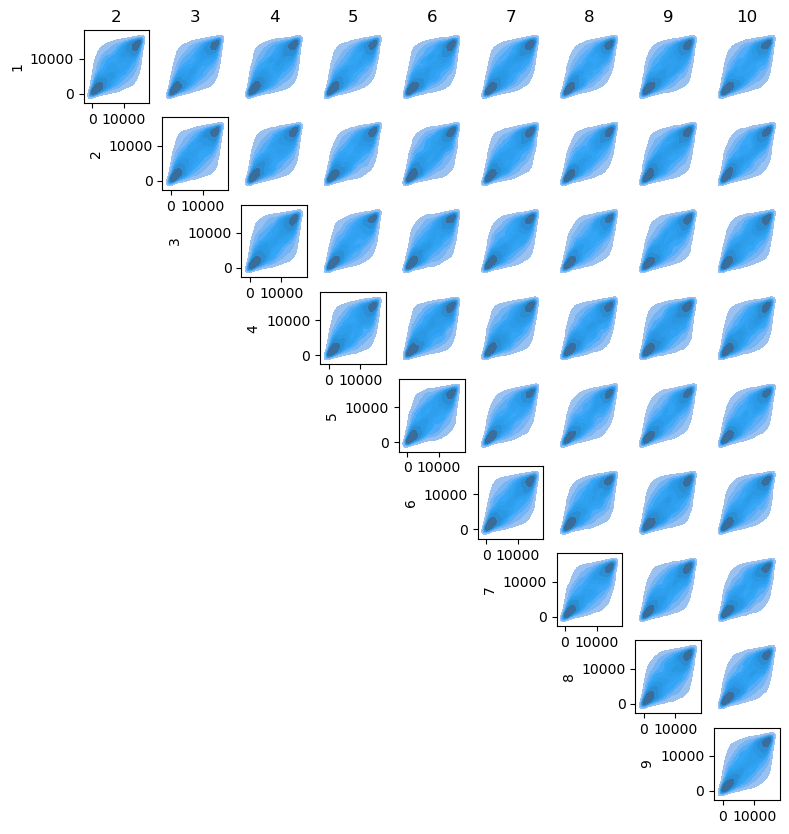

In [5]:
model_name_1 = "MLP"
model_name_2 = "MLP"
n_repet = 10

save_name = f"compare_ranked_genes_{model_name_1}"

method = "hist"
binwidth = 2000
plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)

method = "kde"
binwidth = None
plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)


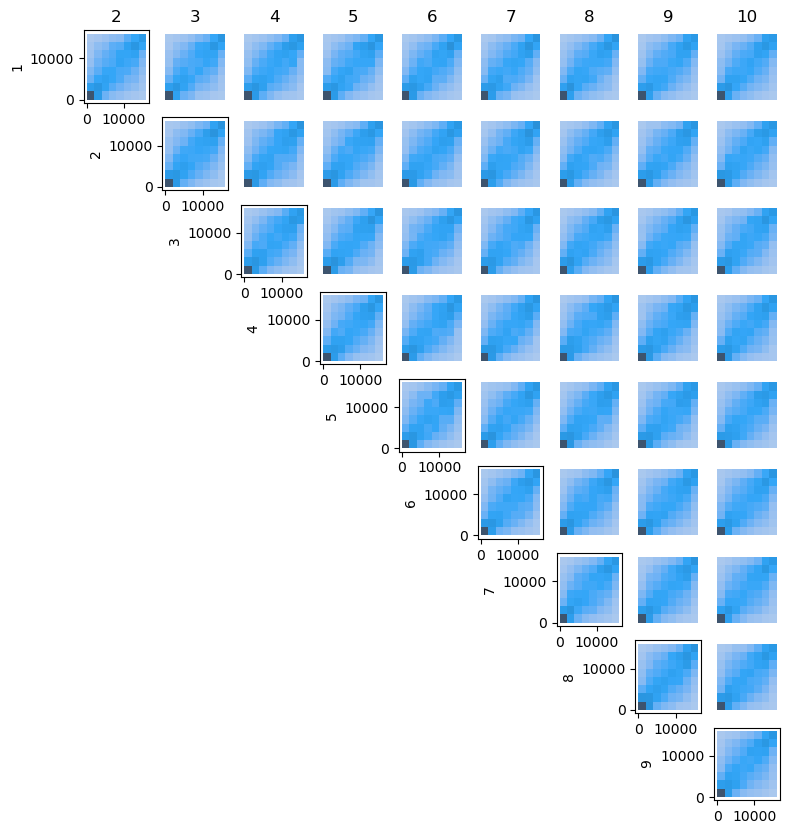

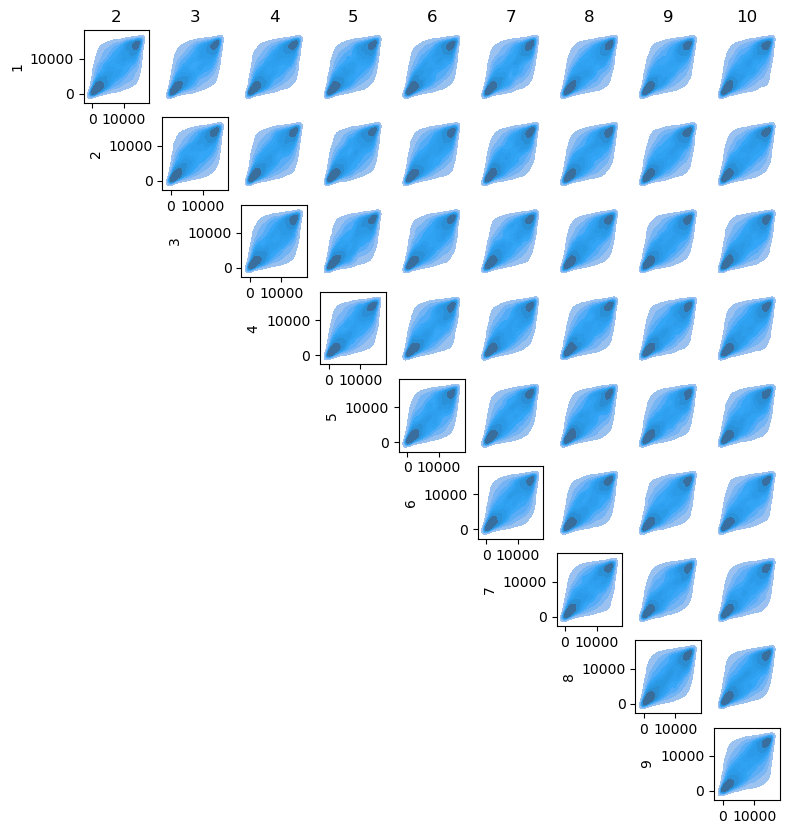

In [6]:
model_name_1 = "LR"
model_name_2 = "LR"

save_name = f"compare_ranked_genes_{model_name_1}"

method = "hist"
binwidth = 2000
plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)

method = "kde"
binwidth = None
plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)



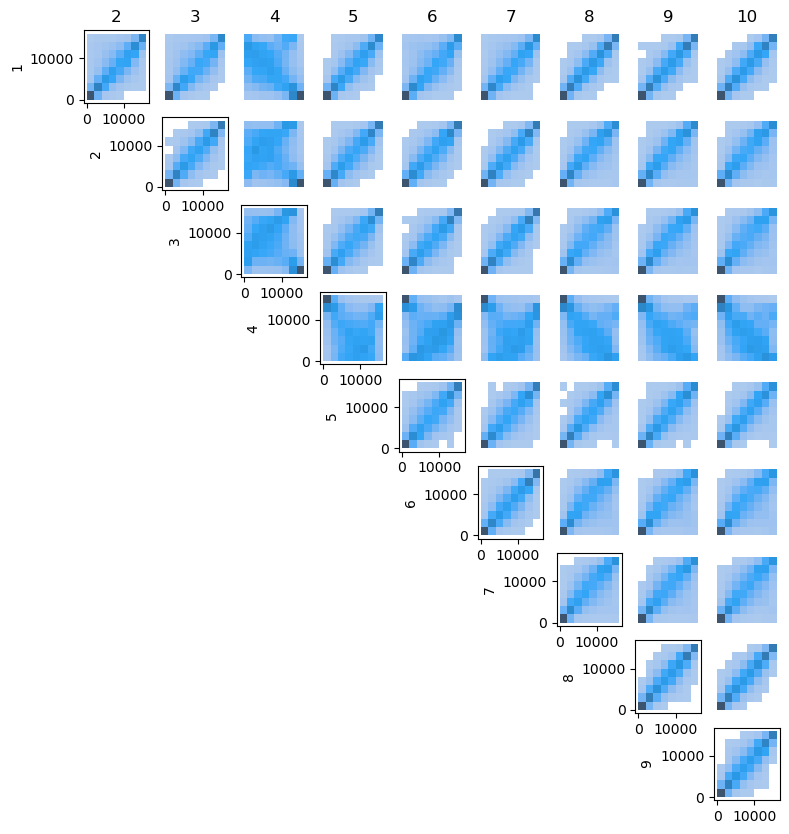

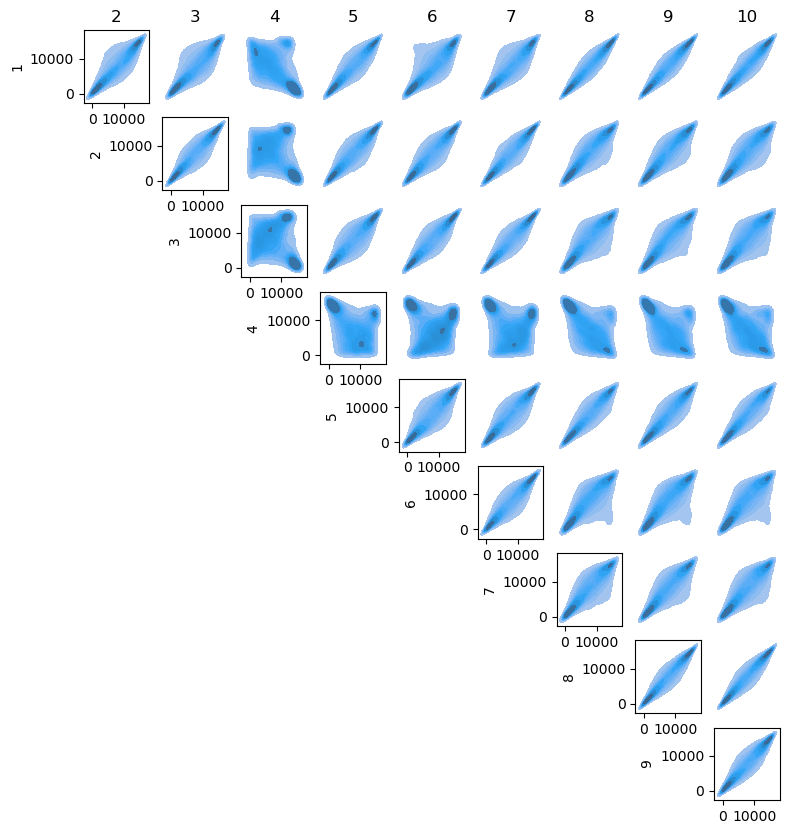

In [7]:
model_name_1 = "GCN"
model_name_2 = "GCN"

save_name = f"compare_ranked_genes_{model_name_1}"

method = "hist"
binwidth = 2000
plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)

method = "kde"
binwidth = None
plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)


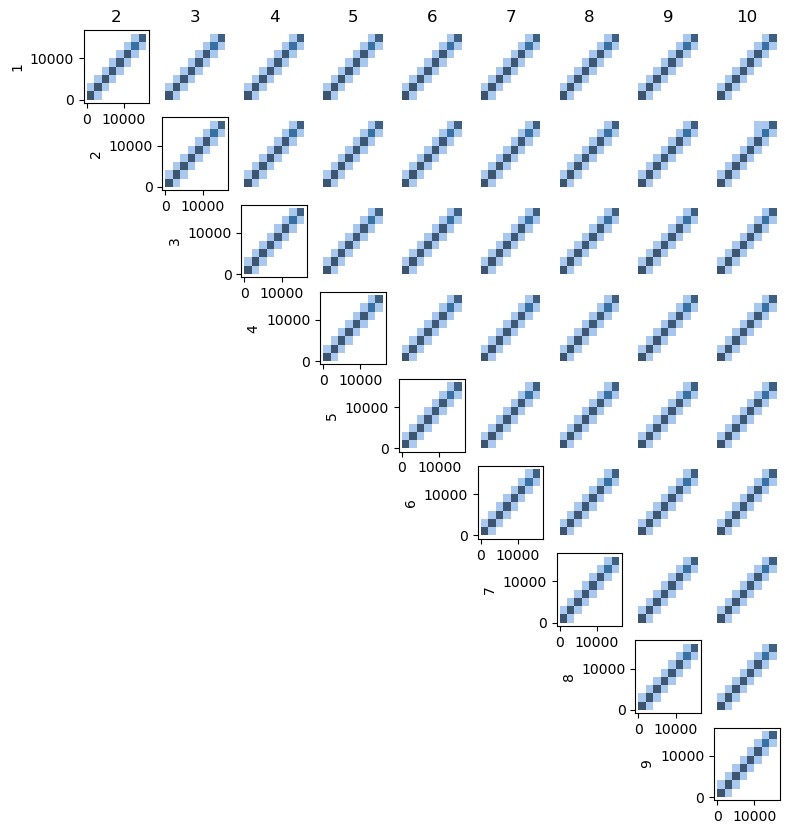

In [8]:
model_name_1 = "LR_L1_penalty"
model_name_2 = "LR_L1_penalty"

save_name = f"compare_ranked_genes_{model_name_1}"

method = "hist"
binwidth = 2000
plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)

# method = "kde"
# binwidth = None
# plot_gene_ranked_by_a_model(set_name[model_name_1], set_name[model_name_2], n_repet, gene_name, save_path, method, binwidth, save_name)


## Comparison across models

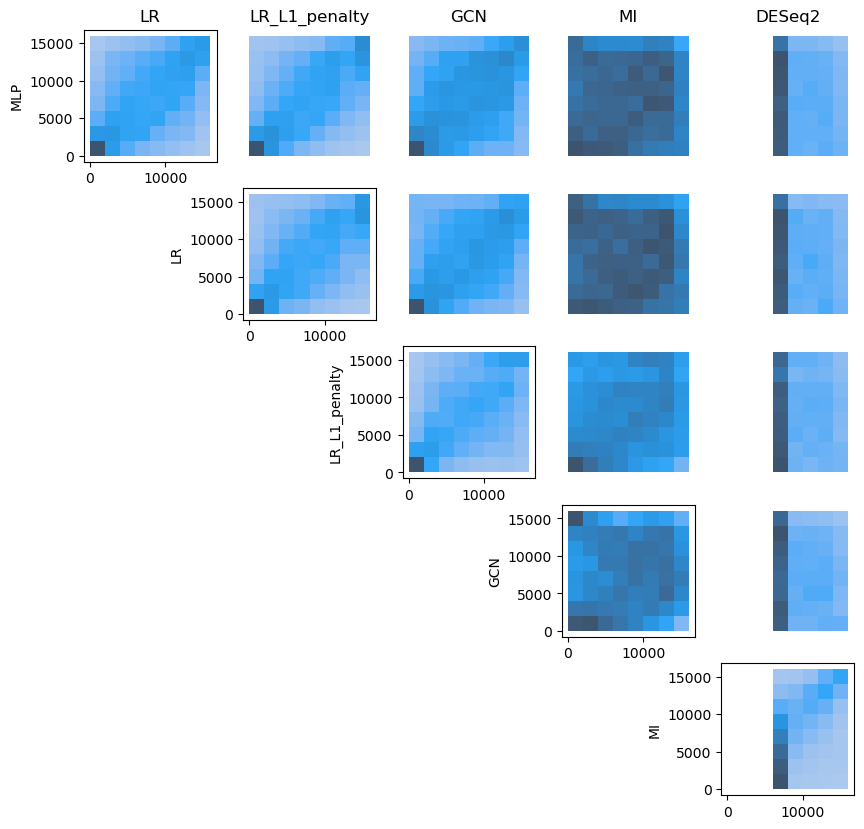

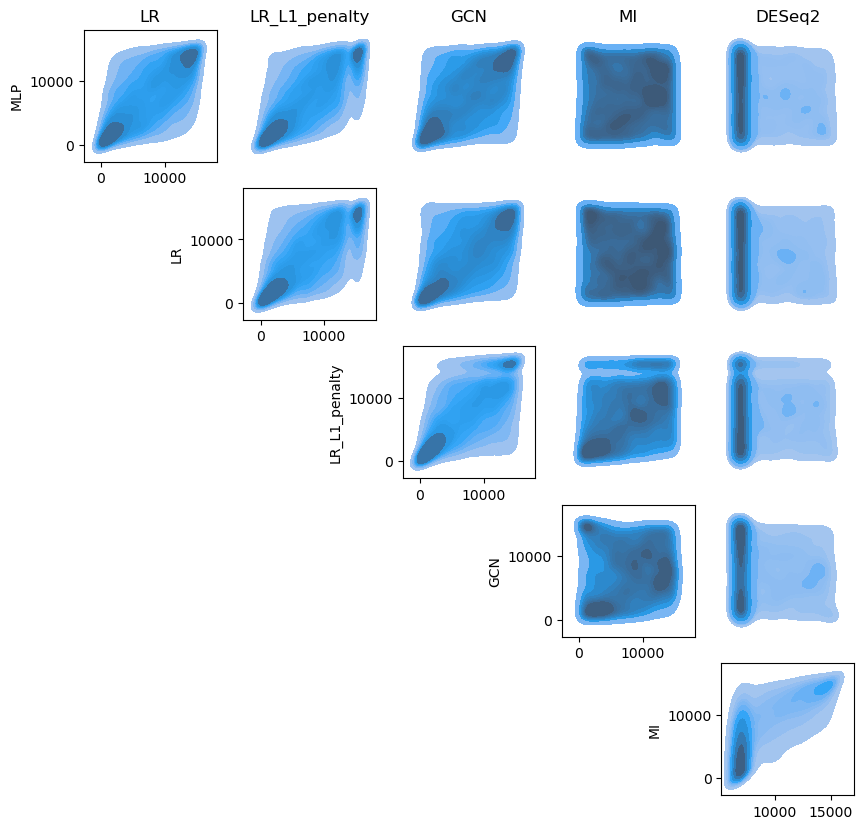

In [9]:
exp = 1
set_names = []
model_names = []
for model_name in ["MLP", "LR", "LR_L1_penalty", "GCN"]:
    model_names.append(model_name)
    set_names.append(set_name[model_name] + f"_exp_{exp}")
for model_name in ["MI", "DESeq2"]:
    model_names.append(model_name)
    set_names.append(set_name[model_name])

save_name = "compare_ranked_genes_all"

method = "hist"
binwidth = 2000
plot_genes_ranked_by_methods(set_names, model_names, gene_name, save_path, method, binwidth, save_name)

method = "kde"
binwidth = None
plot_genes_ranked_by_methods(set_names, model_names, gene_name, save_path, method, binwidth, save_name)


## Other representations

In [10]:
# plt.figure(figsize=(2, 2))
# plt.plot(gene_rank_1[:n_feat], gene_rank_2[:n_feat], '+')
# plt.plot(np.arange(n_feat), np.arange(n_feat), '+')
# plt.show()